# TCHOUPE KENGNE DEKEL JUNIOR 19M2394
Groupe 13   Analyse statistique Lissages Exponentiels

# premier jeu de données (Trim)

ici nous calculons la meilleur valeur de alpha pur le jeu de données Trim

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
data= pd.read_csv("trim.csv", index_col='Years',parse_dates=True)
data=data['Trim2']

plt.show()
listeAlpha=[0.1, 0.3, 0.5, 0.7, 0.9]

# Lissage exponentiel simple 

[9251610.24689525, 35521368.987522505, 96529173.85080376, 237620493.258941, 604362265.3966963]
la plus petite erreur est de 9251610.24689525 calculée avec la valeur alpha égale a : 0.1
[9251610.24689525, 35521368.987522505, 96529173.85080376, 237620493.258941, 604362265.3966963, 0, 0, 0, 0, 0]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


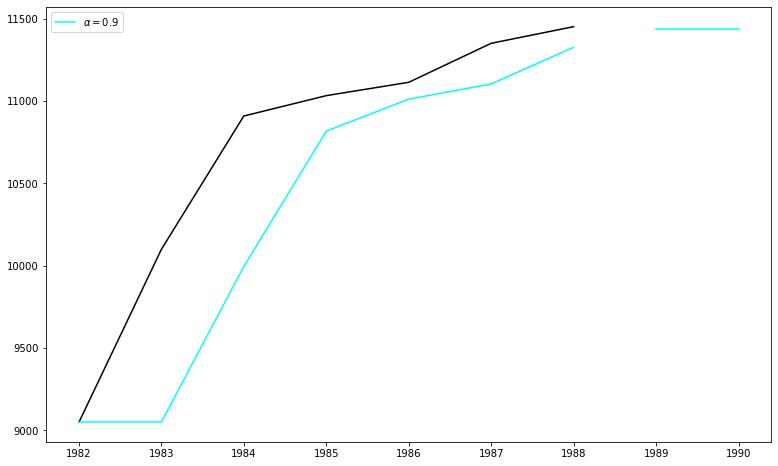

In [2]:
An=[]
def prévision(t,alpha):
    an=0
    l1=0
    for i in range(0,t) :
        an=alpha**i*(data[t-i-1])+an
    l1 = (1-alpha)*an
    return l1
    
def minimisation(h):
    ans=0
    for alpha in listeAlpha:
        for t in range(1,len(data)-h):
            ans=(data[t+h] - prévision(t,alpha))**2+ans
        An.append(ans)
    print(An)
    
minimisation(1)
print("la plus petite erreur est de "+str(min(An))+
      " calculée avec la valeur alpha égale a : "+str(listeAlpha[An.index(min(An))]))
minimisation(7)
# print("la plus petite erreur est de "+str(min(An))+" calculée avec la valeur alpha égale a : "+str(listeAlpha[An.index(min(An))]))

import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
forecast_timestep = 2
fit_1 = SimpleExpSmoothing(data).fit(smoothing_level=0.9,optimized=False)
forecast1 = fit_1.forecast(forecast_timestep).rename(r'$\alpha=0.9$')
plt.figure(figsize=(13,8))
plt.plot(data,  color='black')
plt.plot(fit_1.fittedvalues,  color='cyan')
line1, = plt.plot(forecast1,  color='cyan')
plt.legend([line1], [forecast1.name])
plt.show()


# Lissage exponentiel double

In [7]:
An=[]
l1=0
def lissage1(alpha):
    an=0
    for j in range(0,len(data)) :
        an=alpha**j*(data[len(data)-j-1])+an
    l1 = (1-alpha)*an
    return l1
def lissage2(alpha):
    an=0
    i=0
    for i in range(0,len(data)-i) :
        an=alpha**i*(data[len(data)-2*i-1])+an
    l1 =an
    ans=0
    for j in range(len(data)):
        ans=alpha**j*l1+ans
    l2= (1-alpha)**2*ans
    return l2
def coef(alpha):
    a1=2*lissage1(alpha)-lissage2(alpha)
    a2=((1-alpha)/alpha)*(lissage1(alpha)-lissage2(alpha))
    return a1,a2
def Xnh(alpha,h):
    a=coef(alpha)
    return a[0]+a[1]*h

def main(h):
    An=[]
    ans=0
    for alpha in listeAlpha:
        for t in range(1,len(data)-h):
            ans=((data[t+h] - Xnh(alpha,h)))**2+ans
        An.append(ans)
    print(An)
    print("la plus petite erreur est de "+str(min(An))+
          " calculée avec la valeur alpha égale a : "+str(listeAlpha[An.index(min(An))]))
main(1)

[6784213412335.091, 12209555933807.504, 17620603383348.49, 23714778510451.086, 29768150724310.17]
la plus petite erreur est de 6784213412335.091 calculée avec la valeur alpha égale a : 0.1


# Deuxième jeu de données
ici nous calculons la meilleur valeur de alpha pur le jeu de données de Ventes

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
data= pd.read_csv("ventes.csv", index_col='DATE',parse_dates=True)
data=data['VENTES']
listeAlpha=[0.1, 0.3, 0.5, 0.7, 0.9]


# Lissage exponentiel simple

[10417134577250.975, 18345924860432.516, 24876110708842.098, 30691232331336.637, 36686739593075.914]
la plus petite erreur est de 10417134577250.975 calculée avec la valeur alpha égale a : 0.1
[10417134577250.975, 18345924860432.516, 24876110708842.098, 30691232331336.637, 36686739593075.914, 8140613219202.059, 14104455333941.69, 18939838131759.023, 23322609717497.066, 28053350899377.027]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


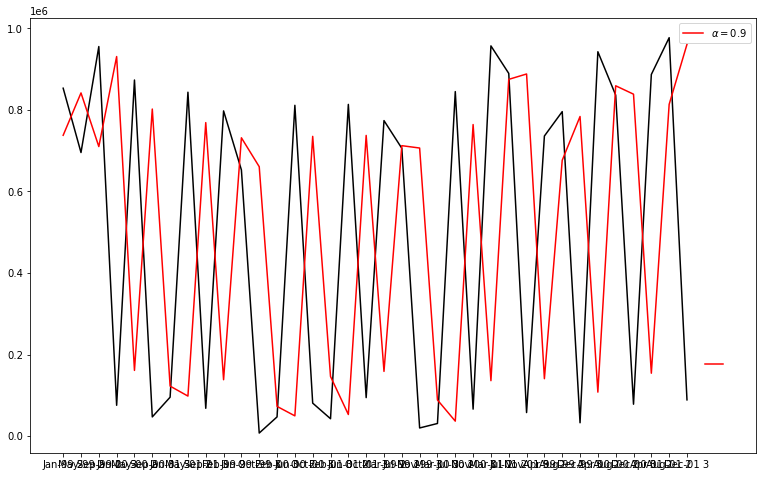

In [5]:
An=[]
def prévision(t,alpha):
    an=0
    l1=0
    for i in range(0,t) :
        an=alpha**i*(data[t-i-1])+an
    l1 = (1-alpha)*an
    return l1
    
def minimisation(h):
    ans=0
    for alpha in listeAlpha:
        for t in range(1,len(data)-h):
            ans=(data[t+h] - prévision(t,alpha))**2+ans
        An.append(ans)
    print(An)
    
minimisation(1)
print("la plus petite erreur est de "+str(min(An))+
      " calculée avec la valeur alpha égale a : "+str(listeAlpha[An.index(min(An))]))
minimisation(7)
# print("la plus petite erreur est de "+str(min(An))+" calculée avec la valeur alpha égale a : "+str(listeAlpha[An.index(min(An))]))


import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
forecast_timestep = 2
fit_1 = SimpleExpSmoothing(data, initialization_method="heuristic").fit(smoothing_level=0.9,optimized=False)
forecast1 = fit_1.forecast(forecast_timestep).rename(r'$\alpha=0.9$')
plt.figure(figsize=(13,8))
plt.plot(data,  color='black')
plt.plot(fit_1.fittedvalues,  color='red')
line1, = plt.plot(forecast1,  color='red')
plt.legend([line1], [forecast1.name])
plt.show()

# Lissage exponentiel double 

In [6]:
An=[]
l1=0
def lissage1(alpha):
    an=0
    for j in range(0,len(data)) :
        an=alpha**j*(data[len(data)-j-1])+an
    l1 = (1-alpha)*an
    return l1
def lissage2(alpha):
    an=0
    i=0
    for i in range(0,len(data)-i) :
        an=alpha**i*(data[len(data)-2*i-1])+an
    l1 =an
    ans=0
    for j in range(len(data)):
        ans=alpha**j*l1+ans
    l2= (1-alpha)**2*ans
    return l2
def coef(alpha):
    a1=2*lissage1(alpha)-lissage2(alpha)
    a2=((1-alpha)/alpha)*(lissage1(alpha)-lissage2(alpha))
    return a1,a2
def Xnh(alpha,h):
    a=coef(alpha)
    return a[0]+a[1]*h

def main(h):
    An=[]
    ans=0
    for alpha in listeAlpha:
        for t in range(1,len(data)-h):
            ans=((data[t+h] - Xnh(alpha,h)))**2+ans
        An.append(ans)
    print(An)
    print("la plus petite erreur est de "+str(min(An))+
          " calculée avec la valeur alpha égale a : "+str(listeAlpha[An.index(min(An))]))
main(1)

[6784213412335.091, 12209555933807.504, 17620603383348.49, 23714778510451.086, 29768150724310.17]
la plus petite erreur est de 6784213412335.091 calculée avec la valeur alpha égale a : 0.1
